In [2]:
import matplotlib.pyplot as plt
import pickle
import evaluate
from datasets import load_dataset

multi_lexsum = load_dataset("allenai/multi_lexsum", name="v20230518")
modified_dataset = multi_lexsum["test"].filter(lambda x: x["summary/short"] != None)

rouge_scoring = evaluate.load("rouge")
bertscore = evaluate.load("bertscore")

In [3]:
import os
import json
import numpy as np

def from_extracted(path, test_size, sentences=5):
    summs = []
    files = os.listdir(path)
    files = sorted(files, key = lambda x: int(x.split(".")[0]))
    for file in files:
        if int(file.split(".")[0]) < test_size:
            docs = json.load(open(path + file, "r"))
            doc = "".join(["".join(doc_sentences[:sentences]) for doc_sentences in docs])
            summs.append(doc)

    return summs


In [4]:
from tqdm import tqdm

extract_types = np.asarray(["random_selection", "first5last5", "random_selection_bert", "first5last5_bert"])
test_size = 75
results = {"score_value": [], "score_type": [], "type": [], "sentences": []}
for extract_sum_type in tqdm(extract_types):
    for sentences in [1,2,3,5,10]:
        sums = from_extracted(f"extracted_sums/extracted_sums_json_{extract_sum_type}/", test_size=test_size, sentences=sentences)
        r_scores = rouge_scoring.compute(predictions=sums, references=modified_dataset[:test_size]["summary/short"],use_stemmer=True)
        b_scores = bertscore.compute(predictions=sums, references=modified_dataset[:test_size]["summary/short"],model_type="microsoft/deberta-large-mnli", batch_size = 10)
        results["type"] += [extract_sum_type] * 4
        results["sentences"] += [sentences] * 4
        results["score_value"] += [r_scores["rouge1"], r_scores["rouge2"], r_scores["rougeL"], b_scores["f1"][0]]
        results["score_type"] += ["rouge1", "rouge2", "rougeL", "bert_score"]

  0%|          | 0/4 [00:00<?, ?it/s]/home/keddie/anaconda3/envs/facilex_caselaw/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
100%|██████████| 4/4 [07:17<00:00, 109.29s/it]


In [4]:
import pickle

# pickle.dump(results, open("ext_results.pickle", "wb"))

In [7]:
results = pickle.load(open("ext_results.pickle", "rb"))

In [11]:
results.keys()

dict_keys(['score_value', 'score_type', 'type', 'sentences'])

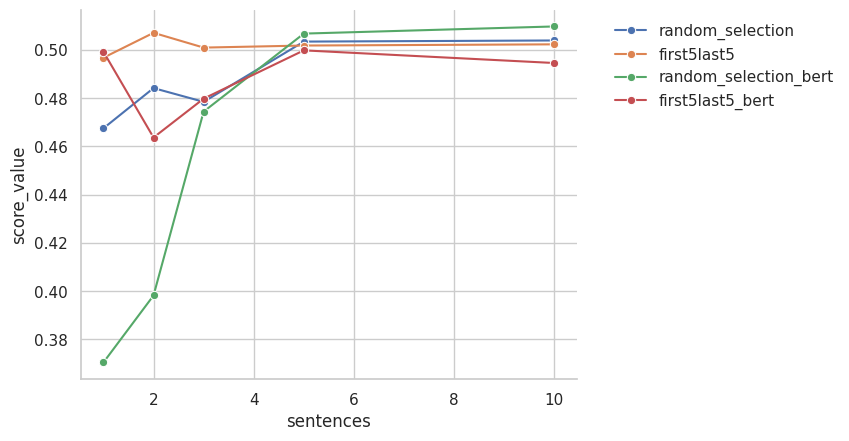

In [17]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(results)
df = df[df["score_type"] == "bert_score"]

sns.set_theme(style="whitegrid")
sns.lineplot(data = df, x = "sentences", y = "score_value", hue = "type", markers=True, marker="o")
# sns.lineplot(data = df, x = "sentences", y = "score_value", hue = "type", markers=True, marker="^", linestyle="--")
# sns.lineplot(data = df, x = "sentences", y = "score_value", hue = "type", markers=True, marker="s", linestyle="-.")
sns.despine()

plt.legend(bbox_to_anchor = (1.05, 1), loc="upper left", frameon = False)
plt.show()

In [3]:
import os

models = os.listdir("answers/")
for model in models:
    print(model)
    for p_type in os.listdir(f"answers/{model}/"):
        print(p_type)
        for sel_type in os.listdir(f"answers/{model}/{p_type}/"):
            print(sel_type, len(os.listdir(f"answers/{model}/{p_type}/{sel_type}/")))
    print("-------------------")

mixtral-8x7b-32768
cod
first5last5_bert 616
random_selection_bert 616
random_selection 616
first5last5 616
detailed
first5last5_bert 75
random_selection_bert 499
random_selection 616
first5last5 616
basic
first5last5_bert 616
random_selection_bert 616
random_selection 616
first5last5 616
-------------------
gemma-7b-it
cod
first5last5_bert 616
random_selection_bert 616
random_selection 605
first5last5 614
detailed
first5last5_bert 616
random_selection_bert 616
random_selection 609
first5last5 614
basic
first5last5_bert 616
random_selection_bert 616
random_selection 607
first5last5 614
-------------------
gpt-3.5-turbo-1106
cod
first5last5_bert 75
random_selection_bert 75
random_selection 75
first5last5 75
detailed
first5last5_bert 75
random_selection_bert 611
random_selection 434
first5last5 563
basic
first5last5_bert 616
random_selection_bert 616
random_selection 548
first5last5 572
-------------------
Meta-Llama-3-8B-Instruct
basic
first5last5_bert 2
random_selection_bert 2
random_se